Importing necessary dependences

In [33]:
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

Reading the data

In [2]:
df = pd.read_csv("updated_df.csv")

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1


Splitting the data into dependent and independent features

In [4]:
X = df.drop(["attack"], axis=1)
Y = df["attack"]

Using Column Transformer

In [13]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

std_scaler = StandardScaler()
encoder = OrdinalEncoder()

pipeline = ColumnTransformer(
    [
        ("label_encoder", encoder, cat_features),
        ("scaler", std_scaler, num_features),
    ]
)

In [14]:
X = pipeline.fit_transform(X)

In [22]:
X.shape

(125972, 42)

Splitting the data into training and testing

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=34)

Model Fitting

In [26]:
rf_clf = RandomForestClassifier()
lr = LogisticRegression()

In [27]:
rf_clf.fit(x_train, y_train)
lr.fit(x_train, y_train)

LogisticRegression()

Models Evaluation

In [28]:
rf_pred = rf_clf.predict(x_test)
lr_pred = lr.predict(x_test)

In [30]:
print(f"accuracy score of logistic regression is {accuracy_score(lr_pred, y_test)}")
print(f"accuracy score of random forest classifier is {accuracy_score(rf_pred, y_test)}")

accuracy score of logistic regression is 0.9770986306806906
accuracy score of random forest classifier is 0.9996824766818814


In [31]:
print("Classification report of Logistic Regression")
print(classification_report(lr_pred, y_test))

Classification report of Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13379
           1       0.98      0.97      0.98     11816

    accuracy                           0.98     25195
   macro avg       0.98      0.98      0.98     25195
weighted avg       0.98      0.98      0.98     25195



In [32]:
print("Classification report of Random Forest Classifier")
print(classification_report(rf_pred, y_test))

Classification report of Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13468
           1       1.00      1.00      1.00     11727

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



Text(0.5, 1.0, 'LR Confusion matrix')

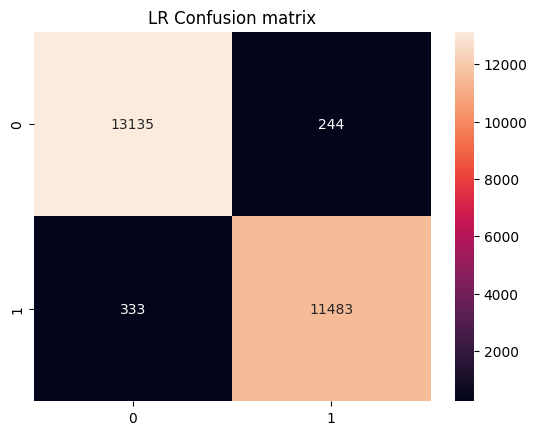

In [34]:
sns.heatmap(confusion_matrix(lr_pred, y_test), annot=True, fmt='g')
plt.title("LR Confusion matrix")

Text(0.5, 1.0, 'RFC Confusion matrix')

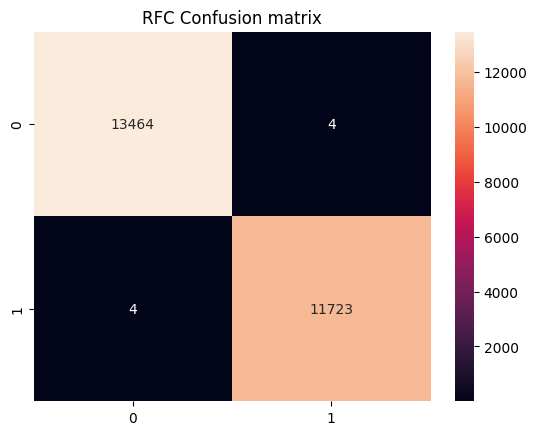

In [35]:
sns.heatmap(confusion_matrix(rf_pred, y_test), annot=True, fmt='g')
plt.title("RFC Confusion matrix")